In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [3]:
stand_scale = StandardScaler()

x_train_trans = stand_scale.fit_transform(x_train.reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_trans = stand_scale.transform(x_valid.reshape(-1, 1)).reshape(-1, 28, 28)
x_test_trans = stand_scale.transform(x_test.reshape(-1, 1)).reshape(-1, 28, 28)

In [10]:
# dropout
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))

# rate:drop probability
# AlphaDropout:1.均值与方差不变，2.归一化不变
model.add(keras.layers.AlphaDropout(rate=0.5))

"""
model.add(keras.layers.Dropout(rate=0.5))
"""
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model.compile(optimizer=keras.optimizers.SGD(0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics = ["accuracy"])
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

In [13]:
history = model.fit(x_train_trans, y_train, epochs=10, 
          validation_data=(x_valid_trans, y_valid), callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 155us/sample - loss: 1.1163 - accuracy: 0.6181 - val_loss: 0.7485 - val_accuracy: 0.8058
Epoch 2/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.6862 - accuracy: 0.7746 - val_loss: 0.6907 - val_accuracy: 0.8308
Epoch 3/10
55000/55000 [==============================] - 9s 168us/sample - loss: 0.5802 - accuracy: 0.8098 - val_loss: 0.6515 - val_accuracy: 0.8418
Epoch 4/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.5220 - accuracy: 0.8309 - val_loss: 0.6244 - val_accuracy: 0.8470
Epoch 5/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.4814 - accuracy: 0.8429 - val_loss: 0.6495 - val_accuracy: 0.8546
Epoch 6/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.4527 - accuracy: 0.8507 - val_loss: 0.5889 - val_accuracy: 0.8532
Epoch 7/10
55000/55000 [===========================

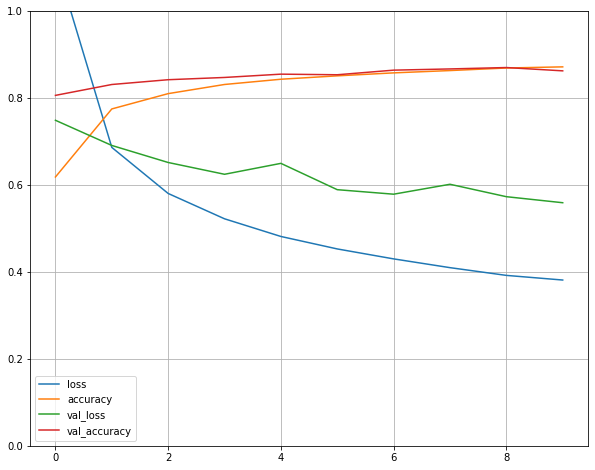

In [14]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(10,8))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [15]:
model.evaluate(x_test_trans, y_test)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.6332 - accuracy: 0.8496


[0.6332102592103184, 0.8496]